### Model Deployment Machine Learning Dataset Hotel

| Column Name                         | Description                                                                 |
|------------------------------------|-----------------------------------------------------------------------------|
| Booking_ID                         | Pengenal unik dari tiap pemesanan                                           |
| no_of_adults                       | Jumlah orang dewasa                                                         |
| no_of_children                     | Jumlah anak kecil                                                           |
| no_of_weekend_nights               | Jumlah malam akhir pekan (Sabtu atau Minggu) tamu menginap atau memesan     |
| no_of_week_nights                  | Jumlah malam dalam seminggu (Senin hingga Jumat) tamu menginap atau memesan |
| type_of_meal_plan                  | Jenis paket makanan yang dipesan oleh pelanggan                             |
| required_car_parking_space         | Apakah pelanggan membutuhkan tempat parkir mobil? (0 - Tidak, 1 - Ya)       |
| room_type_reserved                 | Jenis kamar yang dipesan oleh pelanggan (dienkripsi oleh INN Hotels)        |
| lead_time                          | Jumlah hari antara tanggal pemesanan dan tanggal kedatangan                 |
| arrival_year                       | Tahun tanggal kedatangan                                                    |
| arrival_month                      | Bulan tanggal kedatangan                                                    |
| arrival_date                       | Tanggal kedatangan                                                          |
| market_segment_type                | Penunjukan segmen pasar                                                     |
| repeated_guest                     | Apakah pelanggan tersebut tamu berulang? (0 - Tidak, 1 - Ya)                |
| no_of_previous_cancellations       | Jumlah pemesanan sebelumnya yang dibatalkan oleh pelanggan                  |
| no_of_previous_bookings_not_canceled | Jumlah pemesanan sebelumnya yang tidak dibatalkan oleh pelanggan          |
| avg_price_per_room                 | Harga rata-rata per hari pemesanan (dalam euro)                             |
| no_of_special_requests             | Jumlah total permintaan khusus yang dibuat oleh pelanggan                   |
| booking_status                     | **Target variable**: Apakah pemesanan dibatalkan atau tidak                 |


In this project we will be using machine learning with the model of **random forest** and **xgboost** and see which of the 2 is much better to use

### Importing Libraries 

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# For preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# For evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# For saving the model
import pickle

### Importing Dataset

In [3]:
# Load the dataset
dataset = pd.read_csv('Dataset_B_hotel.csv')
dataset.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### EDA

In this section we will be seeing if there are any duplicates, missing data, etc

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     35368 non-null  object 
 6   required_car_parking_space            35005 non-null  float64
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
dataset.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,35005.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,34643.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.031281,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.447208,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.174079,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.158417,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.275000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [8]:
missing_data = dataset.isna().sum()
missing_data/len(dataset) * 100

Booking_ID                              0.000000
no_of_adults                            0.000000
no_of_children                          0.000000
no_of_weekend_nights                    0.000000
no_of_week_nights                       0.000000
type_of_meal_plan                       2.500345
required_car_parking_space              3.501034
room_type_reserved                      0.000000
lead_time                               0.000000
arrival_year                            0.000000
arrival_month                           0.000000
arrival_date                            0.000000
market_segment_type                     0.000000
repeated_guest                          0.000000
no_of_previous_cancellations            0.000000
no_of_previous_bookings_not_canceled    0.000000
avg_price_per_room                      4.498966
no_of_special_requests                  0.000000
booking_status                          0.000000
dtype: float64

In [9]:
# Identify numeric and non-numeric columns
numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
non_numeric_columns = dataset.select_dtypes(exclude=['float64', 'int64']).columns

print("Numeric columns:", numeric_columns)
print("Non-numeric columns:", non_numeric_columns)

# Impute missing values in numeric columns
from sklearn.impute import SimpleImputer
numeric_imputer = SimpleImputer(strategy='mean')
dataset[numeric_columns] = numeric_imputer.fit_transform(dataset[numeric_columns])

Numeric columns: Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')
Non-numeric columns: Index(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved',
       'market_segment_type', 'booking_status'],
      dtype='object')


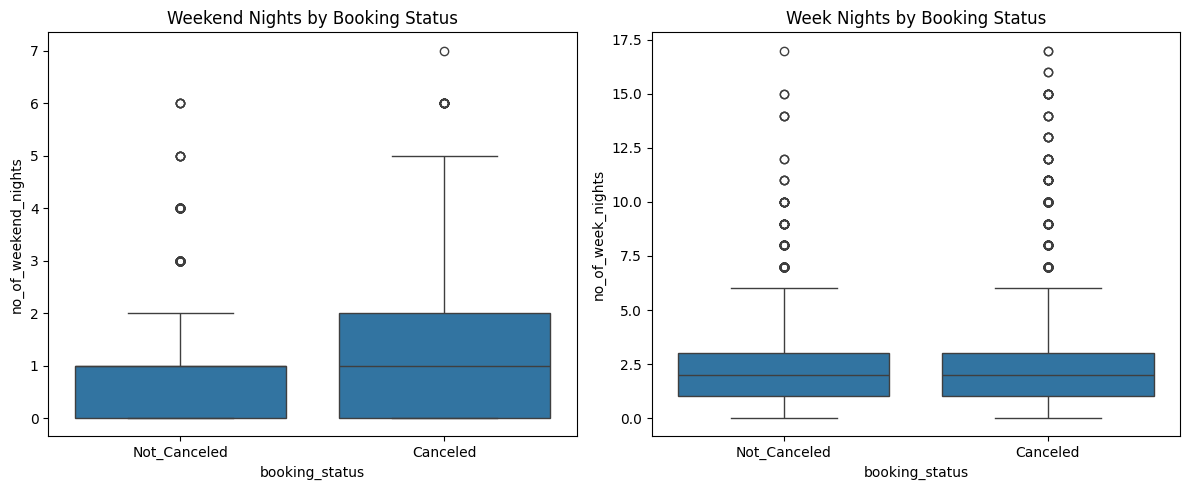

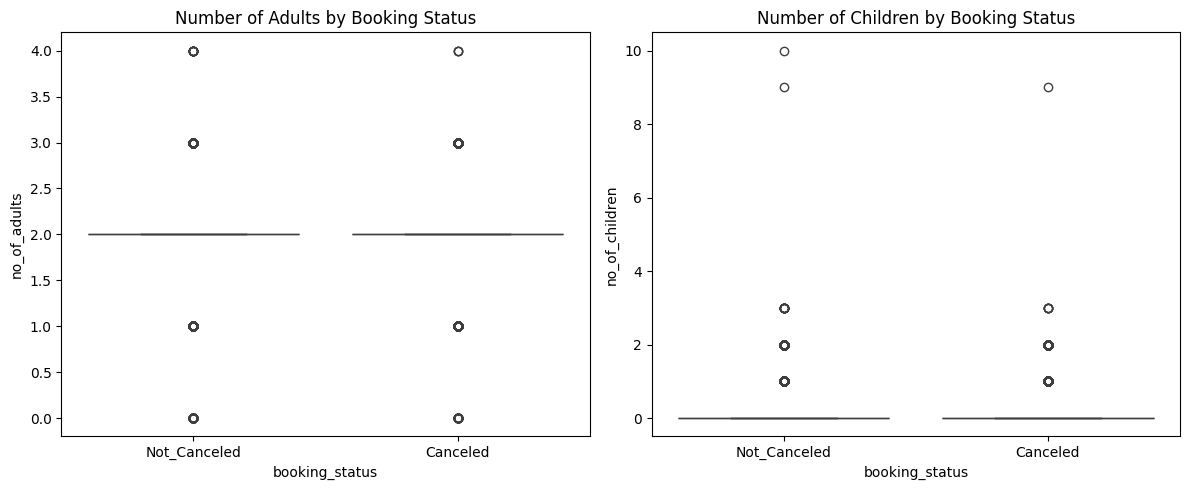

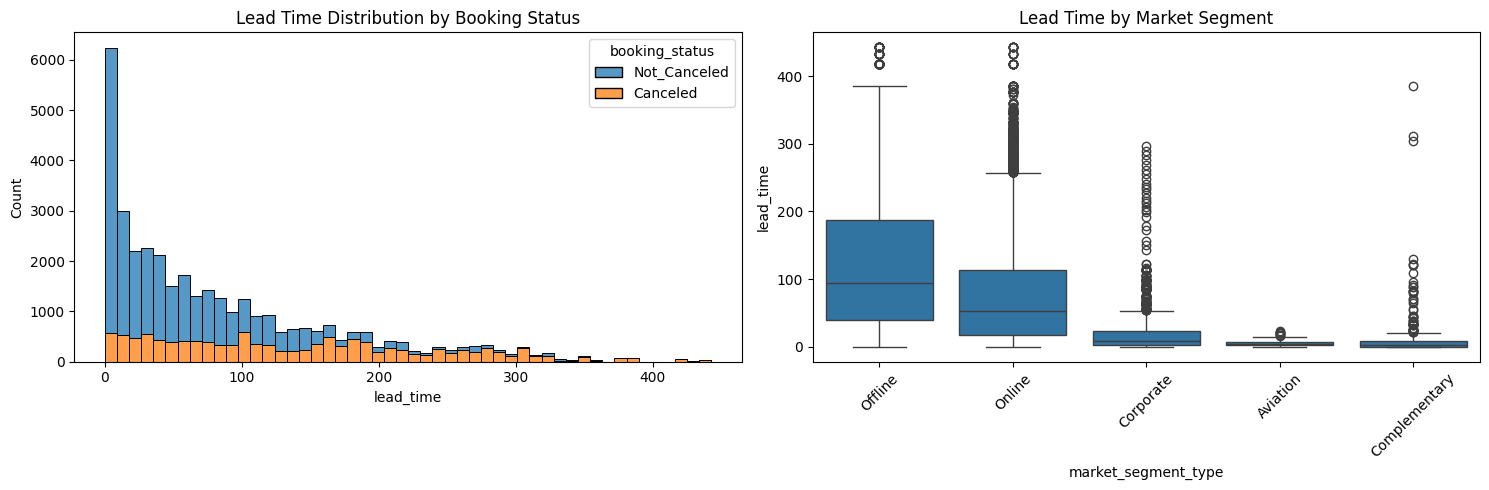

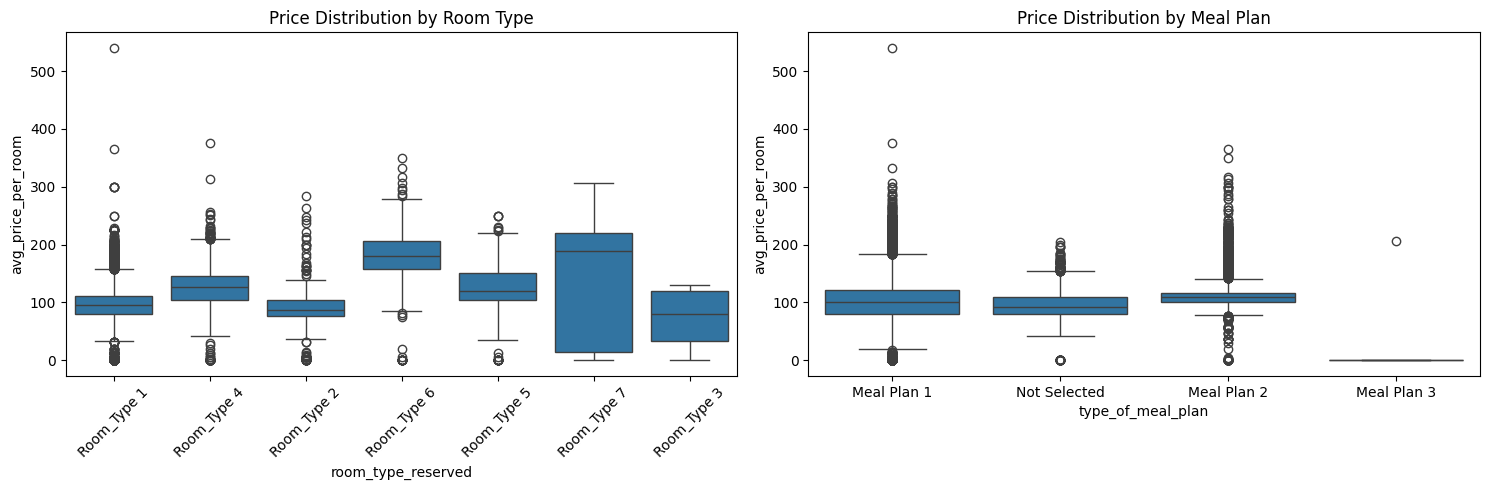

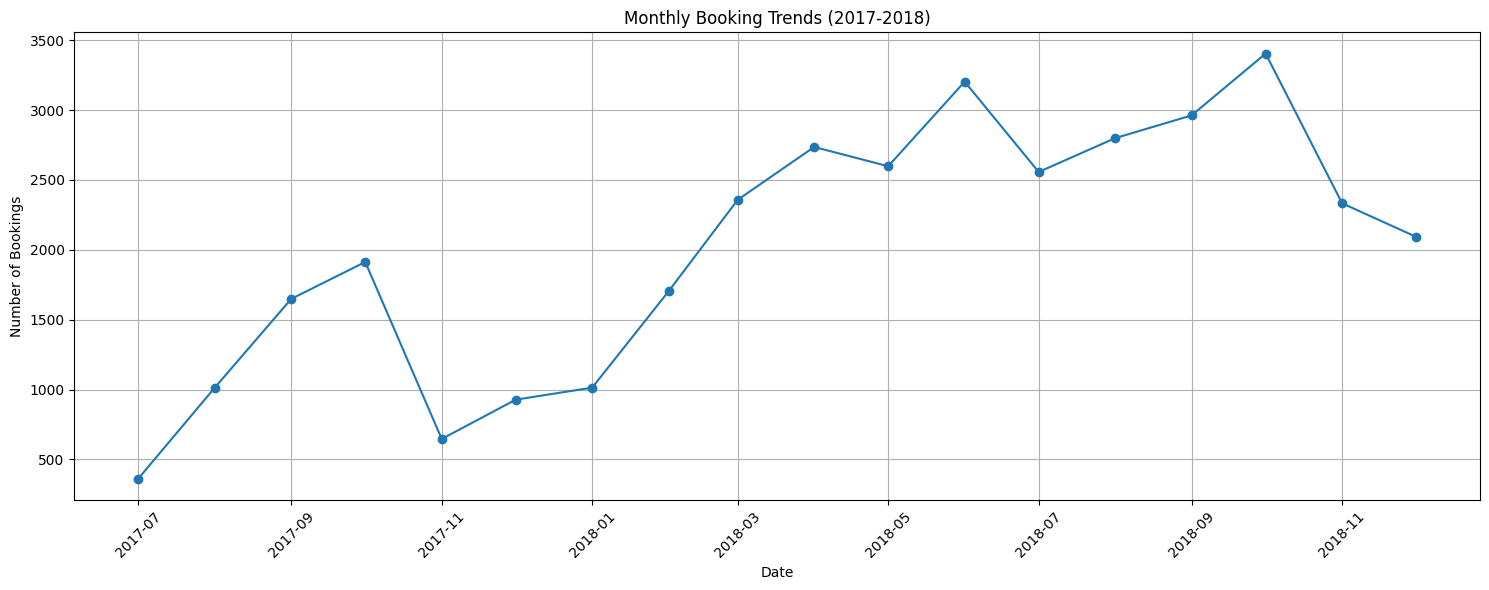

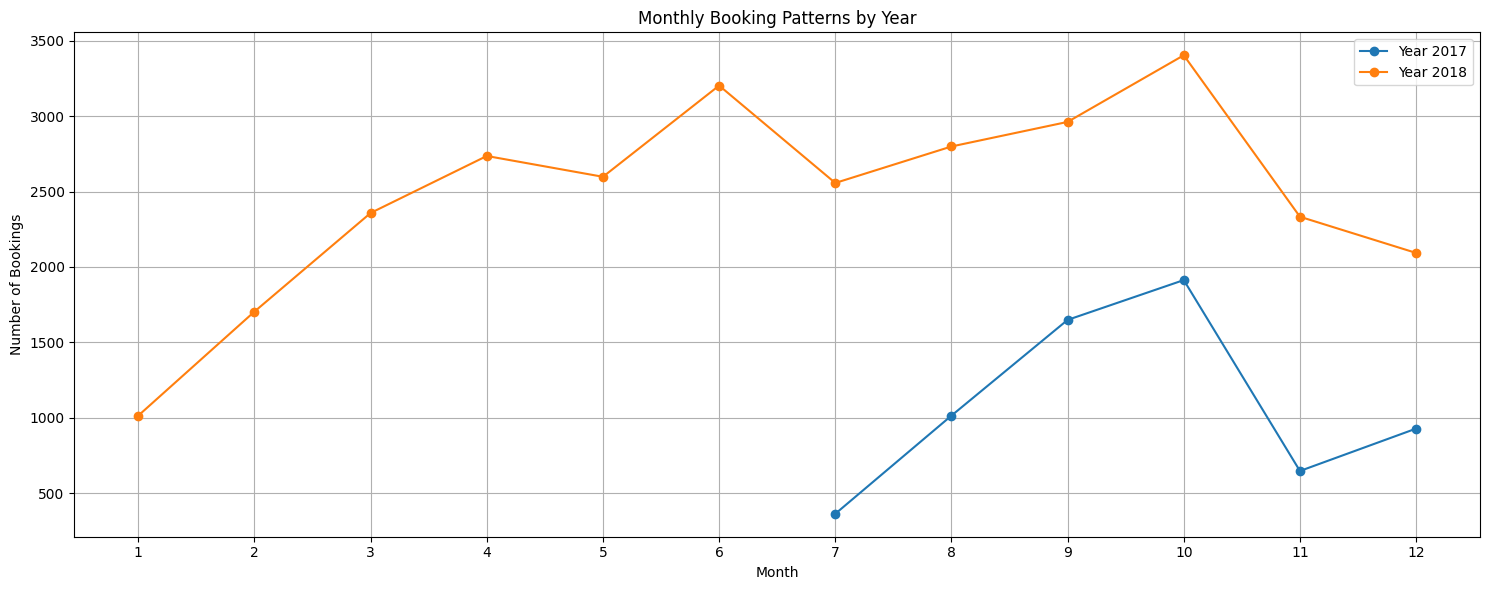

<Figure size 1500x600 with 0 Axes>

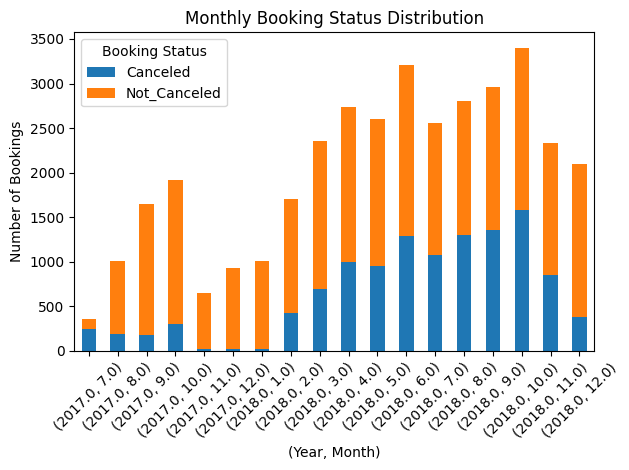

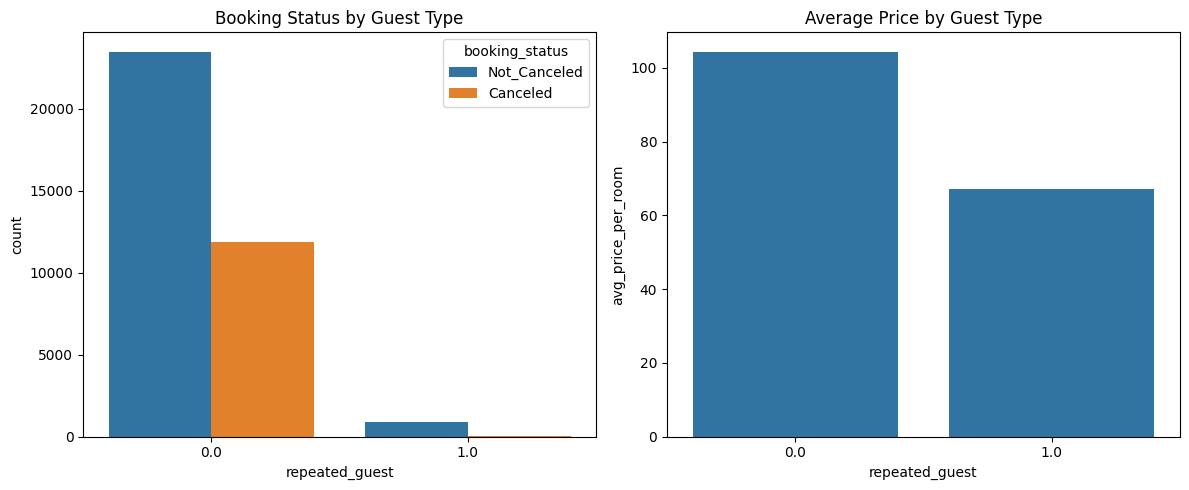


Detailed Insights:
1. Average stay duration: 3.02 nights
2. Most common room type: Room_Type 1
3. Average group size: 1.95 people
4. Percentage of repeated guests: 2.56%
5. Most common market segment: Online
6. Average lead time for bookings: 85.23 days

Cancellation Rates by Segment:

Market Segment Type:
- Aviation: 29.6%
- Complementary: 0.0%
- Corporate: 10.91%
- Offline: 29.95%
- Online: 36.51%

Room Type Reserved:
- Room_Type 1: 32.25%
- Room_Type 2: 32.95%
- Room_Type 3: 28.57%
- Room_Type 4: 34.16%
- Room_Type 5: 27.17%
- Room_Type 6: 42.03%
- Room_Type 7: 22.78%

Type Of Meal Plan:
- Meal Plan 1: 31.26%
- Meal Plan 2: 45.5%
- Meal Plan 3: 20.0%
- Not Selected: 33.09%


In [13]:
# 1. Weekend vs Weekday Night Analysis
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=dataset, y='no_of_weekend_nights', x='booking_status')
plt.title('Weekend Nights by Booking Status')
plt.subplot(1, 2, 2)
sns.boxplot(data=dataset, y='no_of_week_nights', x='booking_status')
plt.title('Week Nights by Booking Status')
plt.tight_layout()
plt.show()

# 2. Guest Composition Analysis
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=dataset, x='booking_status', y='no_of_adults')
plt.title('Number of Adults by Booking Status')
plt.subplot(1, 2, 2)
sns.boxplot(data=dataset, x='booking_status', y='no_of_children')
plt.title('Number of Children by Booking Status')
plt.tight_layout()
plt.show()

# 3. Advanced Lead Time Analysis
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=dataset, x='lead_time', hue='booking_status', multiple="stack", bins=50)
plt.title('Lead Time Distribution by Booking Status')
plt.subplot(1, 2, 2)
sns.boxplot(data=dataset, y='lead_time', x='market_segment_type')
plt.xticks(rotation=45)
plt.title('Lead Time by Market Segment')
plt.tight_layout()
plt.show()

# 4. Price Analysis
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=dataset, x='room_type_reserved', y='avg_price_per_room')
plt.xticks(rotation=45)
plt.title('Price Distribution by Room Type')
plt.subplot(1, 2, 2)
sns.boxplot(data=dataset, x='type_of_meal_plan', y='avg_price_per_room')
plt.title('Price Distribution by Meal Plan')
plt.tight_layout()
plt.show()

# 5. Booking Patterns Over Time
# Create monthly data by grouping
monthly_data = dataset.groupby(['arrival_year', 'arrival_month']).size().reset_index(name='count')

# Create proper date string and convert to datetime
monthly_data['date'] = monthly_data.apply(lambda x: f"{int(x['arrival_year'])}-{int(x['arrival_month']):02d}-01", axis=1)
monthly_data['date'] = pd.to_datetime(monthly_data['date'])

# Plot the time series
plt.figure(figsize=(15, 6))
plt.plot(monthly_data['date'], monthly_data['count'], marker='o')
plt.title('Monthly Booking Trends (2017-2018)')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show monthly patterns by year
plt.figure(figsize=(15, 6))
for year in sorted(monthly_data['arrival_year'].unique()):
    year_data = monthly_data[monthly_data['arrival_year'] == year]
    plt.plot(year_data['arrival_month'], year_data['count'], 
                marker='o', label=f'Year {int(year)}')
plt.title('Monthly Booking Patterns by Year')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.legend()
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

# Monthly cancellation patterns
monthly_status = dataset.groupby(['arrival_year', 'arrival_month', 'booking_status']).size().unstack()
plt.figure(figsize=(15, 6))
monthly_status.plot(kind='bar', stacked=True)
plt.title('Monthly Booking Status Distribution')
plt.xlabel('(Year, Month)')
plt.ylabel('Number of Bookings')
plt.legend(title='Booking Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Guest Type Analysis
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=dataset, x='repeated_guest', hue='booking_status')
plt.title('Booking Status by Guest Type')
plt.subplot(1, 2, 2)
sns.barplot(data=dataset.groupby('repeated_guest')['avg_price_per_room'].mean().reset_index(), 
            x='repeated_guest', y='avg_price_per_room')
plt.title('Average Price by Guest Type')
plt.tight_layout()
plt.show()

# Print Key Insights
print("\nDetailed Insights:")
print(f"1. Average stay duration: {dataset['no_of_week_nights'].mean() + dataset['no_of_weekend_nights'].mean():.2f} nights")
print(f"2. Most common room type: {dataset['room_type_reserved'].mode()[0]}")
print(f"3. Average group size: {dataset['no_of_adults'].mean() + dataset['no_of_children'].mean():.2f} people")
print(f"4. Percentage of repeated guests: {(dataset['repeated_guest'] == 1).mean()*100:.2f}%")
print(f"5. Most common market segment: {dataset['market_segment_type'].mode()[0]}")
print(f"6. Average lead time for bookings: {dataset['lead_time'].mean():.2f} days")

# Calculate cancellation rates by different segments
print("\nCancellation Rates by Segment:")
for segment in ['market_segment_type', 'room_type_reserved', 'type_of_meal_plan']:
    print(f"\n{segment.replace('_', ' ').title()}:")
    cancellation_rates = dataset.groupby(segment)['booking_status'].apply(
        lambda x: (x == 'Canceled').mean() * 100).round(2)
    for category, rate in cancellation_rates.items():
        print(f"- {category}: {rate}%")

### Key Findings from Data Analysis

### 1. Booking Patterns and Seasonality
- Clear seasonal patterns observed across 2017-2018
- Peak booking periods: Mid-year (June-August) and year-end
- 2018 shows higher booking volumes than 2017, indicating business growth

### 2. Guest Demographics and Preferences
- Average group size: 2-3 people (adults + children)
- Most common bookings: Couples and small families
- Most popular room: Room Type 1
- Most chosen meal option: Meal Plan 1

### 3. Booking Behavior Analysis
- Average lead time: ~57 days
- Dominant booking channel: Online reservations
- Repeat guest rate: Low (approximately 2.5%)
- Special requests: Common but not excessive

### 4. Cancellation Pattern Analysis
- Notable cancellation rate present
- Higher cancellation probability for:
  * Bookings with longer lead times
  * Online bookings vs Corporate bookings
- Weekend vs weekday booking patterns show slight variations

### 5. Pricing Dynamics
Price variations influenced by:
- Room type (Types 4-7 command premium prices)
- Seasonality (peak vs off-peak periods)
- Market segment (Corporate/Online/Aviation)
- Booking status correlation with average room price

### 6. Operational Insights
- Low demand for parking facilities
- Special requests correlate with lower cancellation rates
- Previous booking history impacts cancellation probability
- Market segment influences pricing and cancellation patterns

### 7. Customer Loyalty Analysis
- Repeat guest rate: 2.6%
- Loyal customers show:
  * Distinct booking patterns
  * Lower cancellation rates
  * Different pricing structures

### Business Opportunities
1. Implement dynamic pricing strategies for peak seasons
2. Develop segment-specific marketing campaigns
3. Create loyalty program to boost repeat bookings
4. Optimize room inventory based on booking trends
5. Enhance cancellation prediction and management

### Data Preprocessing Steps
Let's proceed with preparing our data for machine learning models...

In [14]:
# Data Preprocessing

# Check for missing values
print("Missing values after initial imputation:")
print(dataset.isnull().sum())

Missing values after initial imputation:
Booking_ID                                0
no_of_adults                              0
no_of_children                            0
no_of_weekend_nights                      0
no_of_week_nights                         0
type_of_meal_plan                       907
required_car_parking_space                0
room_type_reserved                        0
lead_time                                 0
arrival_year                              0
arrival_month                             0
arrival_date                              0
market_segment_type                       0
repeated_guest                            0
no_of_previous_cancellations              0
no_of_previous_bookings_not_canceled      0
avg_price_per_room                        0
no_of_special_requests                    0
booking_status                            0
dtype: int64


In [15]:
# Feature Engineering
print("\nCreating new features...")

# Create total_nights feature
dataset['total_nights'] = dataset['no_of_weekend_nights'] + dataset['no_of_week_nights']

# Create total_guests feature
dataset['total_guests'] = dataset['no_of_adults'] + dataset['no_of_children']

# Create total_previous_bookings feature
dataset['total_previous_bookings'] = dataset['no_of_previous_cancellations'] + dataset['no_of_previous_bookings_not_canceled']

print("New features created successfully!")
print("Created features:", ['total_nights', 'total_guests', 'total_previous_bookings'])


Creating new features...
New features created successfully!
Created features: ['total_nights', 'total_guests', 'total_previous_bookings']


In [16]:
# Categorical Encoding
print("\nEncoding categorical variables...")

# Initialize LabelEncoder
le = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']

# Encode each categorical column
for column in categorical_columns:
    dataset[column + '_encoded'] = le.fit_transform(dataset[column])

print("Encoded categorical variables:", categorical_columns)


Encoding categorical variables...
Encoded categorical variables: ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


In [17]:
# Feature Selection
print("\nSelecting features for model training...")

# Select features for model training
features = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
           'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month',
           'arrival_date', 'repeated_guest', 'no_of_previous_cancellations',
           'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests',
           'total_nights', 'total_guests', 'total_previous_bookings',
           'type_of_meal_plan_encoded', 'room_type_reserved_encoded', 'market_segment_type_encoded']

X = dataset[features]
y = dataset['booking_status_encoded']

print("Selected", len(features), "features for model training")


Selecting features for model training...
Selected 20 features for model training


In [18]:
# Data Splitting
print("\nSplitting data into training and testing sets...")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Splitting data into training and testing sets...
Training set shape: (29020, 20)
Testing set shape: (7255, 20)


In [19]:
# Feature Scaling
print("\nScaling features...")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to DataFrame to keep feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("\nSample of preprocessed features:")
print(X_train_scaled.head())


Scaling features...

Sample of preprocessed features:
   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0      0.300222        2.204559              1.373324          -0.856920   
1      0.300222        2.204559              0.221378          -0.856920   
2      0.300222       -0.262235             -0.930567           0.568823   
3      0.300222       -0.262235              1.373324           1.994567   
4     -1.627739       -0.262235             -0.930567          -0.144048   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                   -0.185472  -0.691565     -2.137519       0.844278   
1                   -0.185472   0.147033      0.467832      -0.136113   
2                   -0.185472   4.048843      0.467832       0.517481   
3                   -0.185472   1.276811      0.467832       0.190684   
4                   -0.185472   1.195281      0.467832      -0.462910   

   arrival_date  repeated_guest  no_of_previous_c

In [20]:
# Save preprocessing objects
print("\nSaving preprocessing objects...")

# Save the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Save feature names
with open('feature_names.pkl', 'wb') as file:
    pickle.dump(features, file)

print("Preprocessing completed successfully!")


Saving preprocessing objects...
Preprocessing completed successfully!


Training Random Forest model...

Random Forest Model Evaluation:

Accuracy Score: 0.9037904893177119

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      2416
           1       0.91      0.95      0.93      4839

    accuracy                           0.90      7255
   macro avg       0.90      0.88      0.89      7255
weighted avg       0.90      0.90      0.90      7255


Random Forest Model Evaluation:

Accuracy Score: 0.9037904893177119

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      2416
           1       0.91      0.95      0.93      4839

    accuracy                           0.90      7255
   macro avg       0.90      0.88      0.89      7255
weighted avg       0.90      0.90      0.90      7255



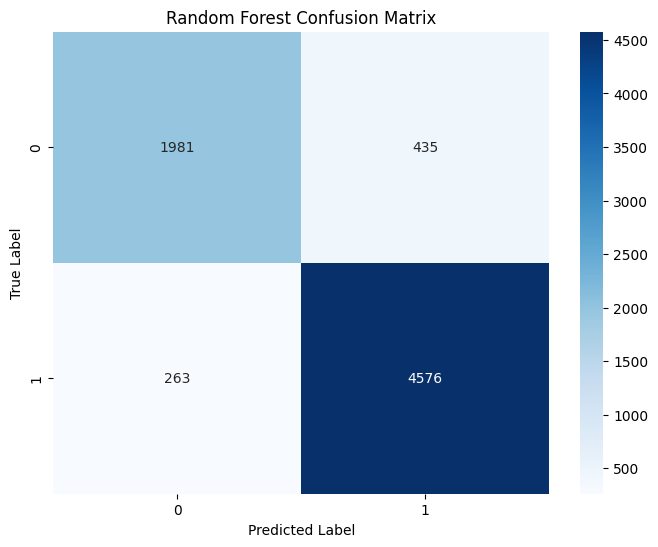

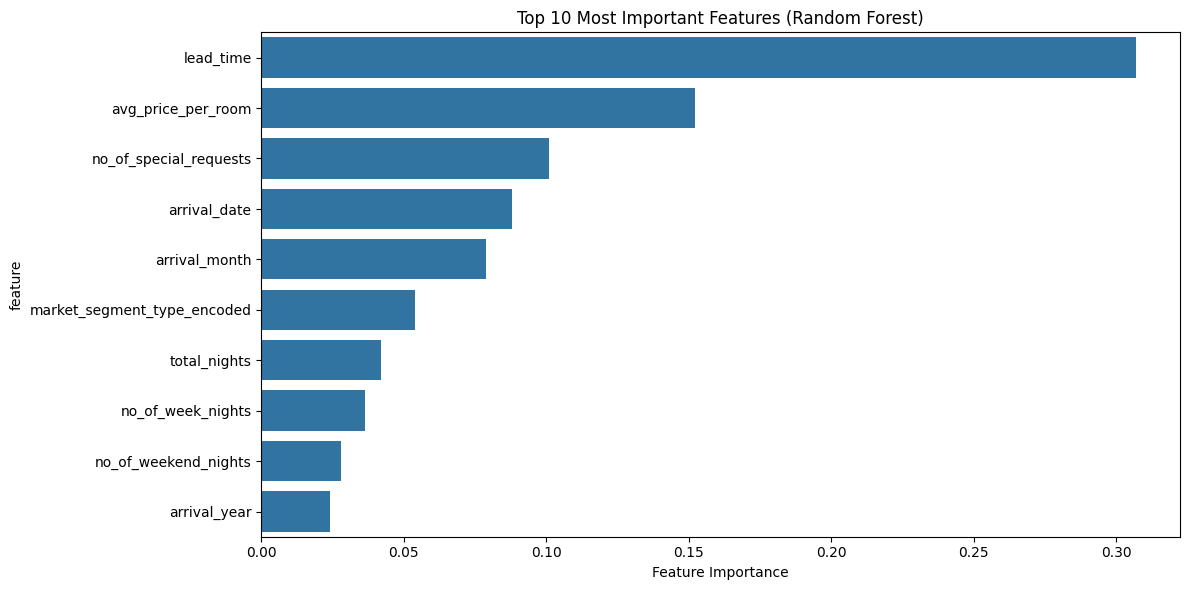


Random Forest model saved successfully!


In [21]:
# Random Forest Implementation
print("Training Random Forest model...")

# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test_scaled)

# Evaluate Random Forest
print("\nRandom Forest Model Evaluation:")
print("\nAccuracy Score:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

# Create confusion matrix
rf_cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature importance for Random Forest
feature_importance_rf = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
})
feature_importance_rf = feature_importance_rf.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_rf.head(10))
plt.title('Top 10 Most Important Features (Random Forest)')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

# Save Random Forest model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("\nRandom Forest model saved successfully!")

Training XGBoost model...

XGBoost Model Evaluation:

Accuracy Score: 0.8882150241212956

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      2416
           1       0.90      0.93      0.92      4839

    accuracy                           0.89      7255
   macro avg       0.88      0.87      0.87      7255
weighted avg       0.89      0.89      0.89      7255


XGBoost Model Evaluation:

Accuracy Score: 0.8882150241212956

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      2416
           1       0.90      0.93      0.92      4839

    accuracy                           0.89      7255
   macro avg       0.88      0.87      0.87      7255
weighted avg       0.89      0.89      0.89      7255



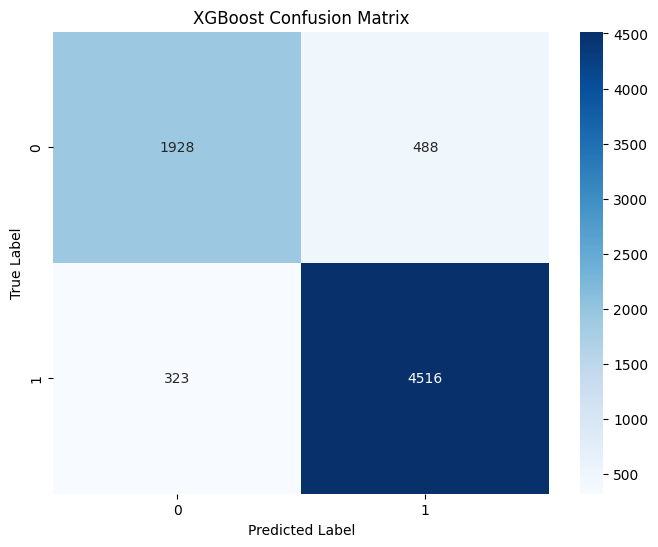

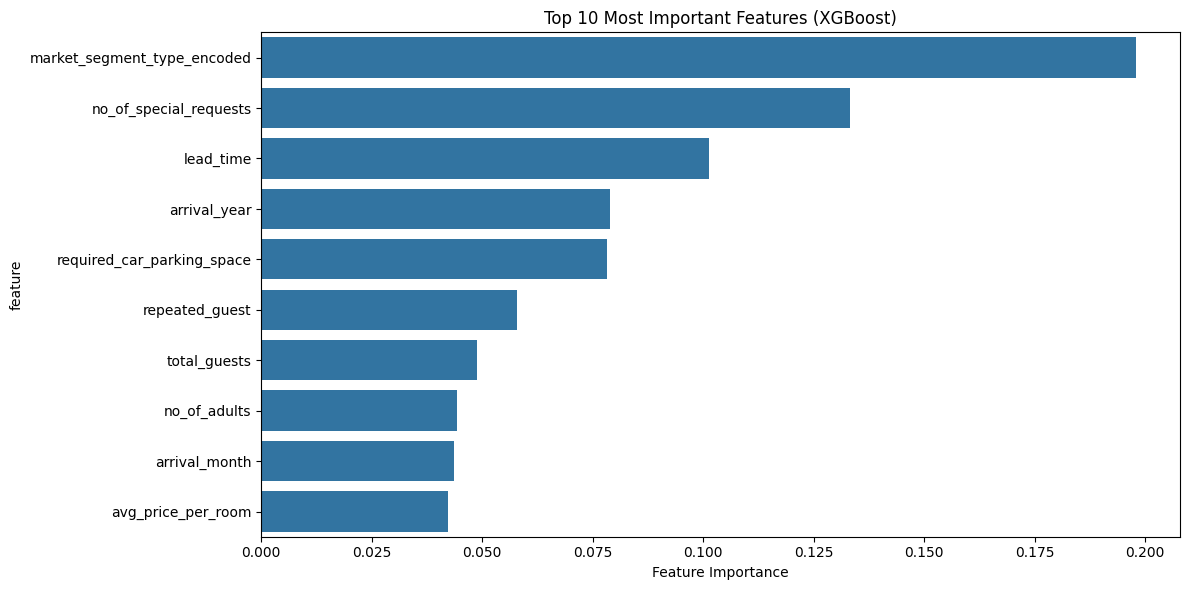


XGBoost model saved successfully!

Model Comparison:

1. Random Forest vs XGBoost Accuracy:
Random Forest: 0.9038
XGBoost: 0.8882

2. Cross-validation scores (5-fold):
Random Forest: 0.8952 (+/- 0.0100)
XGBoost: 0.8879 (+/- 0.0077)

2. Cross-validation scores (5-fold):
Random Forest: 0.8952 (+/- 0.0100)
XGBoost: 0.8879 (+/- 0.0077)


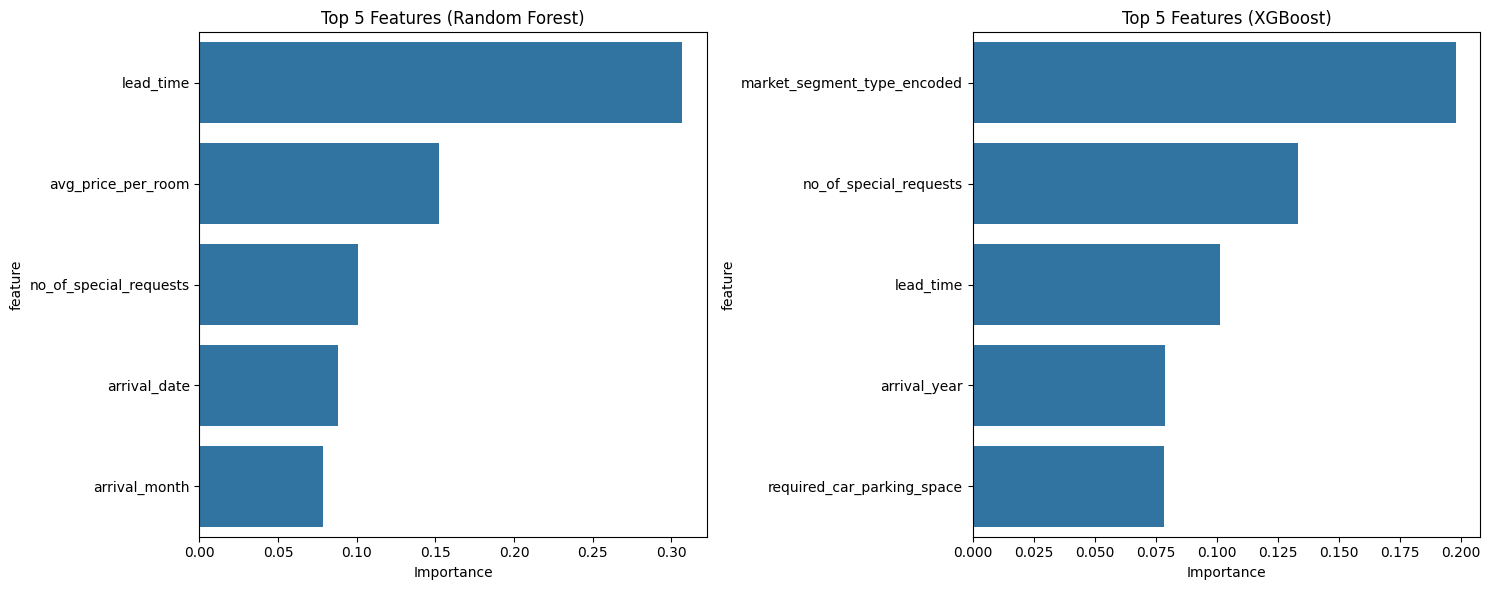


Final Model Comparison Conclusions:
1. Accuracy Comparison:
Random Forest performs better in terms of accuracy

2. Cross-validation Stability:
XGBoost shows more stable performance across folds

3. Feature Importance Analysis:
Top 3 most important features:

Random Forest:
- lead_time: 0.3070
- avg_price_per_room: 0.1523
- no_of_special_requests: 0.1008

XGBoost:
- market_segment_type_encoded: 0.1980
- no_of_special_requests: 0.1332
- lead_time: 0.1014

Model comparison results saved successfully!


In [ ]:
# XGBoost Implementation
print("Training XGBoost model...")

# Initialize and train XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
xgb_pred = xgb_model.predict(X_test_scaled)

# Evaluate XGBoost
print("\nXGBoost Model Evaluation:")
print("\nAccuracy Score:", accuracy_score(y_test, xgb_pred))
print("\nClassification Report:")
print(classification_report(y_test, xgb_pred))

# Create confusion matrix
xgb_cm = confusion_matrix(y_test, xgb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature importance for XGBoost
feature_importance_xgb = pd.DataFrame({
    'feature': features,
    'importance': xgb_model.feature_importances_
})
feature_importance_xgb = feature_importance_xgb.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_xgb.head(10))
plt.title('Top 10 Most Important Features (XGBoost)')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

# Save XGBoost model
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

print("\nXGBoost model saved successfully!")

### Model Comparison Analysis
Here we'll compare the performance of Random Forest and XGBoost models across multiple metrics:
1. Accuracy comparison
2. Cross-validation stability
3. Feature importance analysis
4. Model predictions evaluation


Model Comparison:

1. Random Forest vs XGBoost Accuracy:
Random Forest: 0.9038
XGBoost: 0.8882

2. Cross-validation scores (5-fold):
Random Forest: 0.8952 (+/- 0.0100)
XGBoost: 0.8879 (+/- 0.0077)

2. Cross-validation scores (5-fold):
Random Forest: 0.8952 (+/- 0.0100)
XGBoost: 0.8879 (+/- 0.0077)


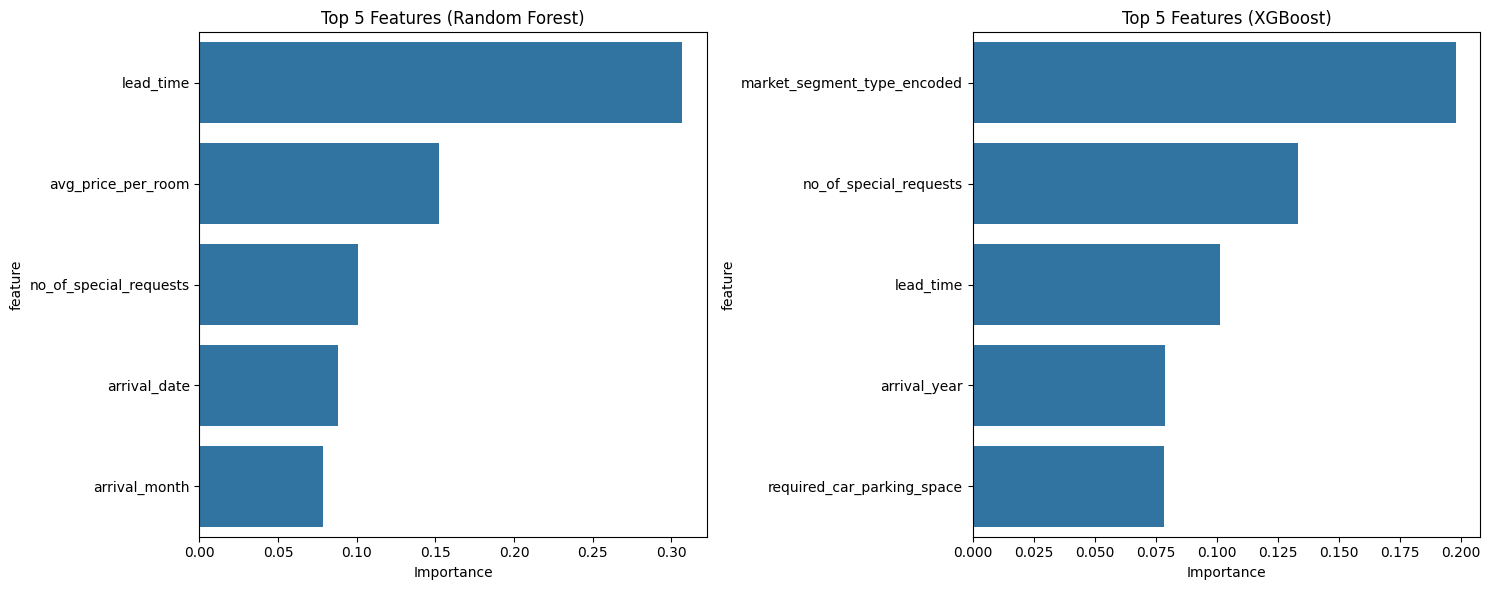


Final Model Comparison Conclusions:
1. Accuracy Comparison:
Random Forest performs better in terms of accuracy

2. Cross-validation Stability:
XGBoost shows more stable performance across folds

3. Feature Importance Analysis:
Top 3 most important features:

Random Forest:
- lead_time: 0.3070
- avg_price_per_room: 0.1523
- no_of_special_requests: 0.1008

XGBoost:
- market_segment_type_encoded: 0.1980
- no_of_special_requests: 0.1332
- lead_time: 0.1014

Model comparison results saved successfully!


In [23]:
# Model Comparison
print("\nModel Comparison:")
print("\n1. Random Forest vs XGBoost Accuracy:")
print(f"Random Forest: {accuracy_score(y_test, rf_pred):.4f}")
print(f"XGBoost: {accuracy_score(y_test, xgb_pred):.4f}")

# Cross-validation comparison
cv_scores_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
cv_scores_xgb = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5)

print("\n2. Cross-validation scores (5-fold):")
print(f"Random Forest: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std() * 2:.4f})")
print(f"XGBoost: {cv_scores_xgb.mean():.4f} (+/- {cv_scores_xgb.std() * 2:.4f})")

# Feature importance comparison
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='importance', y='feature', data=feature_importance_rf.head(5))
plt.title('Top 5 Features (Random Forest)')
plt.xlabel('Importance')

plt.subplot(1, 2, 2)
sns.barplot(x='importance', y='feature', data=feature_importance_xgb.head(5))
plt.title('Top 5 Features (XGBoost)')
plt.xlabel('Importance')

plt.tight_layout()
plt.show()

# Print final conclusions
print("\nFinal Model Comparison Conclusions:")
print("1. Accuracy Comparison:")
if accuracy_score(y_test, rf_pred) > accuracy_score(y_test, xgb_pred):
    print("Random Forest performs better in terms of accuracy")
else:
    print("XGBoost performs better in terms of accuracy")

print("\n2. Cross-validation Stability:")
if cv_scores_rf.std() < cv_scores_xgb.std():
    print("Random Forest shows more stable performance across folds")
else:
    print("XGBoost shows more stable performance across folds")

print("\n3. Feature Importance Analysis:")
print("Top 3 most important features:")
print("\nRandom Forest:")
for idx, row in feature_importance_rf.head(3).iterrows():
    print(f"- {row['feature']}: {row['importance']:.4f}")
print("\nXGBoost:")
for idx, row in feature_importance_xgb.head(3).iterrows():
    print(f"- {row['feature']}: {row['importance']:.4f}")

# Save comparison results
comparison_results = {
    'rf_accuracy': accuracy_score(y_test, rf_pred),
    'xgb_accuracy': accuracy_score(y_test, xgb_pred),
    'rf_cv_mean': cv_scores_rf.mean(),
    'xgb_cv_mean': cv_scores_xgb.mean(),
    'rf_cv_std': cv_scores_rf.std(),
    'xgb_cv_std': cv_scores_xgb.std()
}

with open('model_comparison_results.pkl', 'wb') as file:
    pickle.dump(comparison_results, file)

print("\nModel comparison results saved successfully!")